1. Descriptive Analytics

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("sales_data_with_discounts.csv" )

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Display summary statistics
print("Descriptive Statistics:\n", df[numerical_cols].describe())

# Compute Mean, Median, Mode, Std Dev for each numerical column
for col in numerical_cols:
    print(f"\nColumn: {col}")
    print("Mean:", df[col].mean())            
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])
    print("Std Dev:", df[col].std())


Descriptive Statistics:
            Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427 

2. Data Visualization

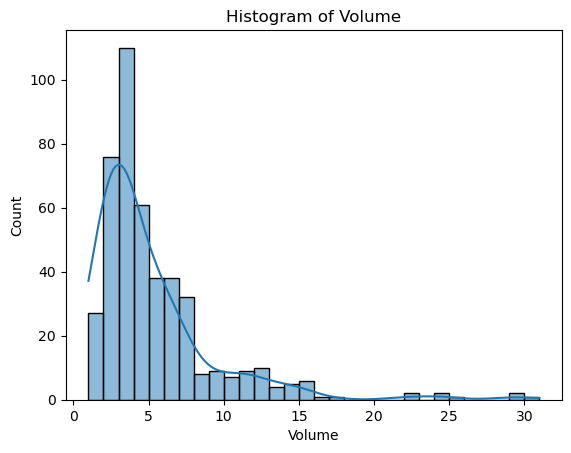

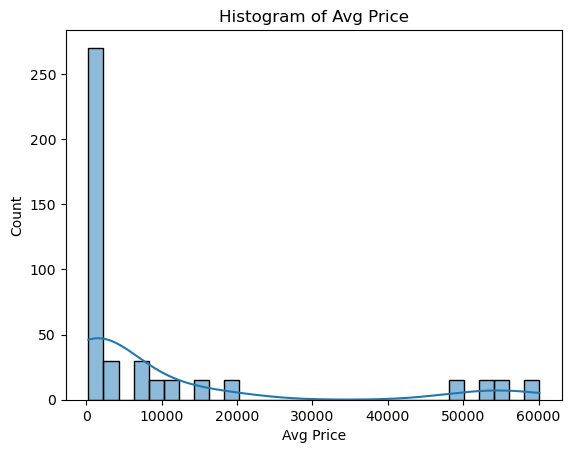

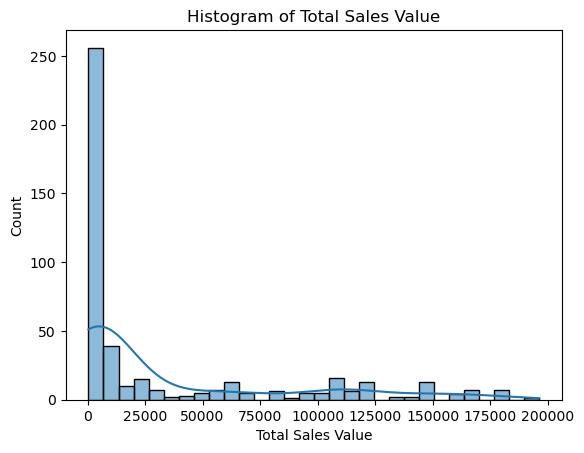

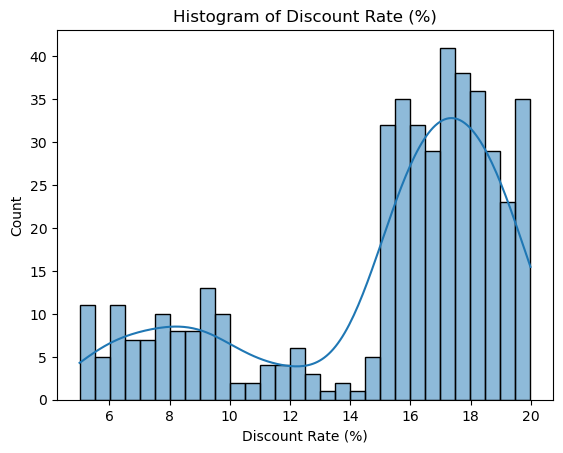

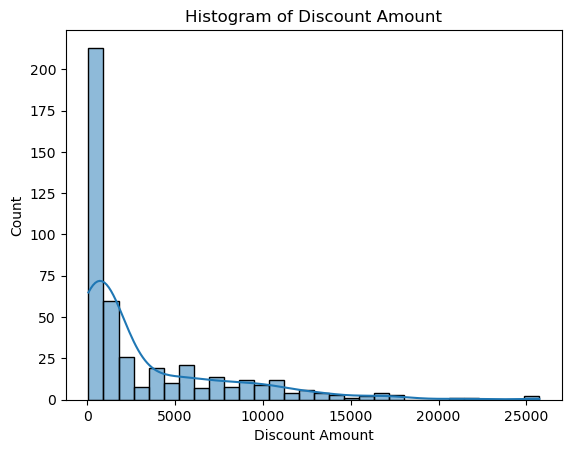

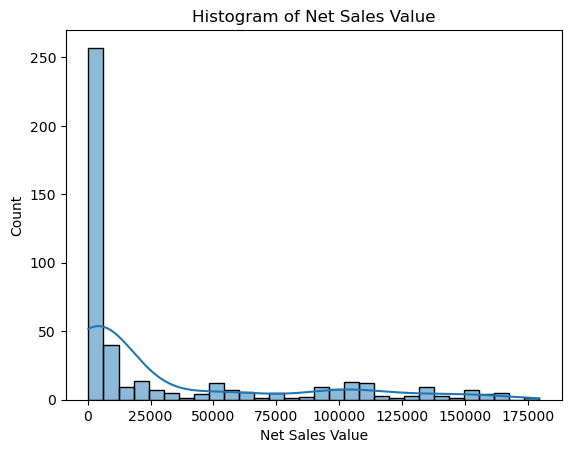

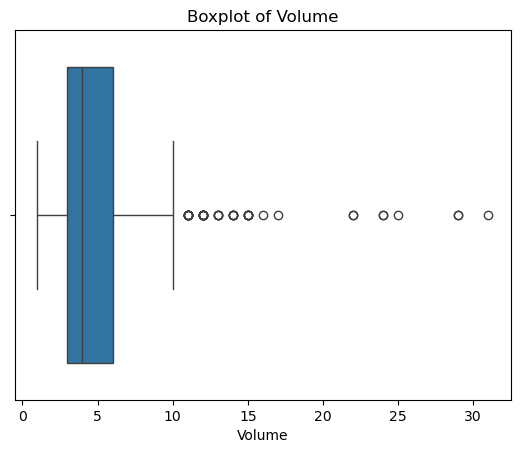

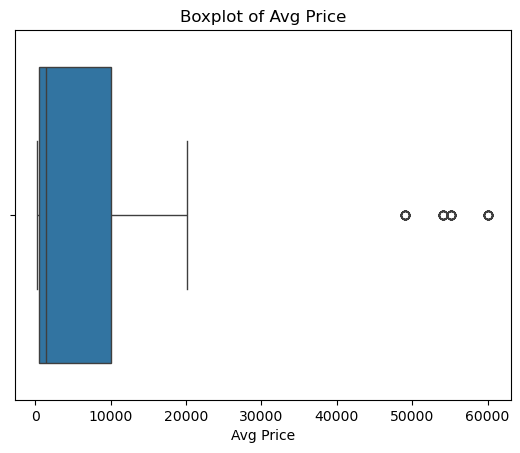

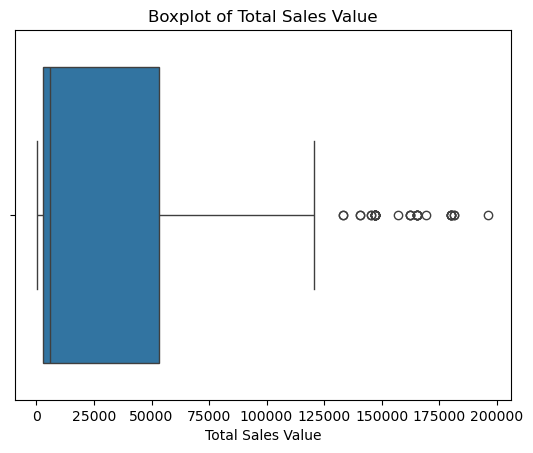

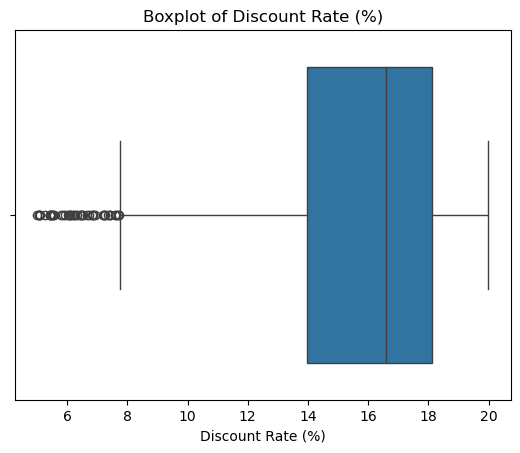

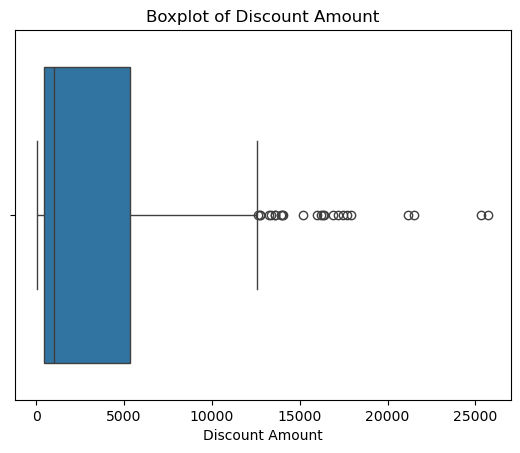

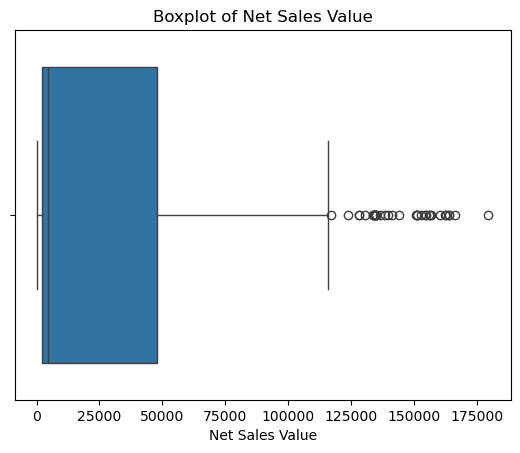

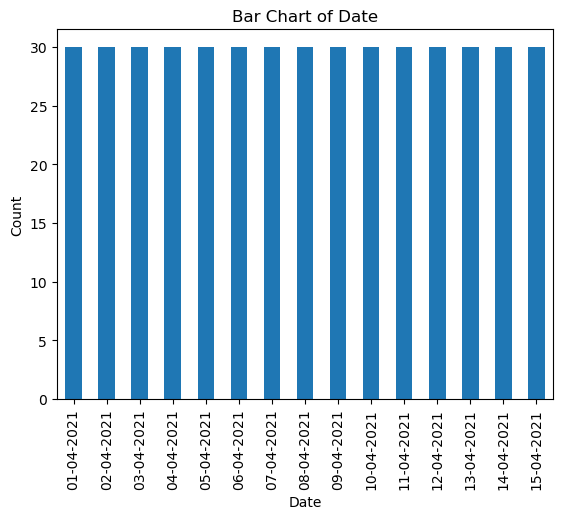

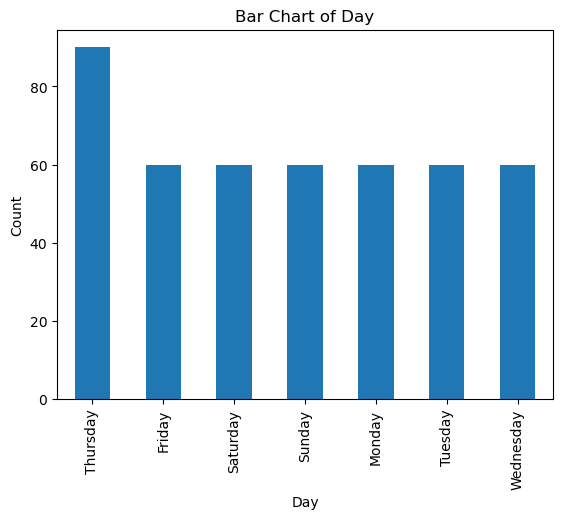

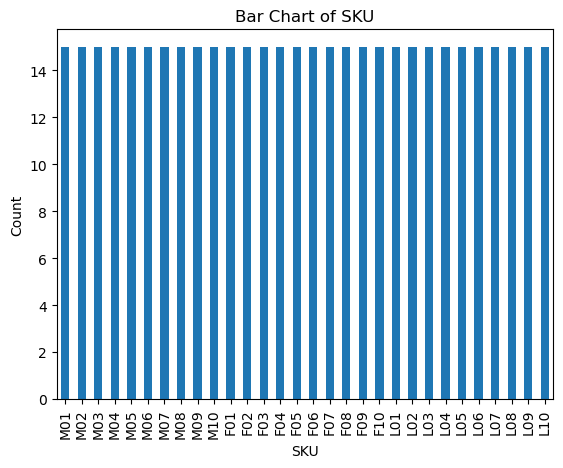

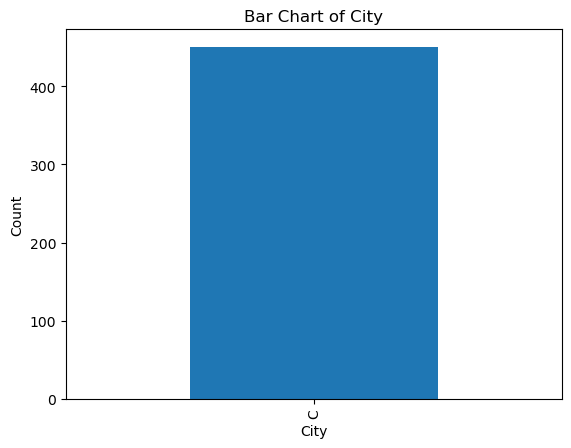

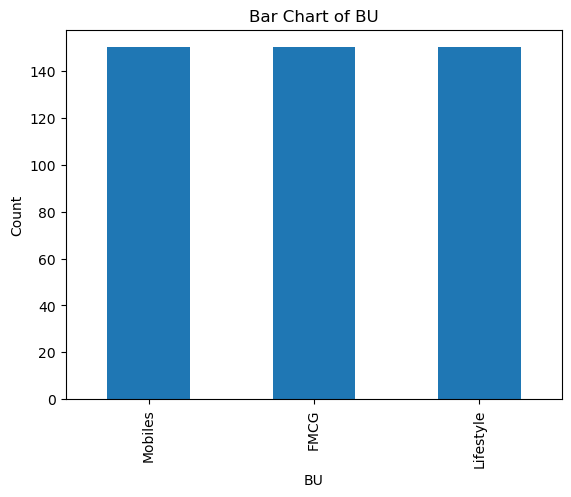

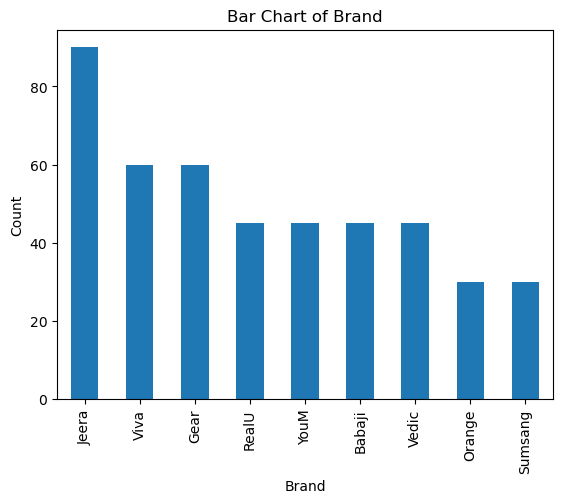

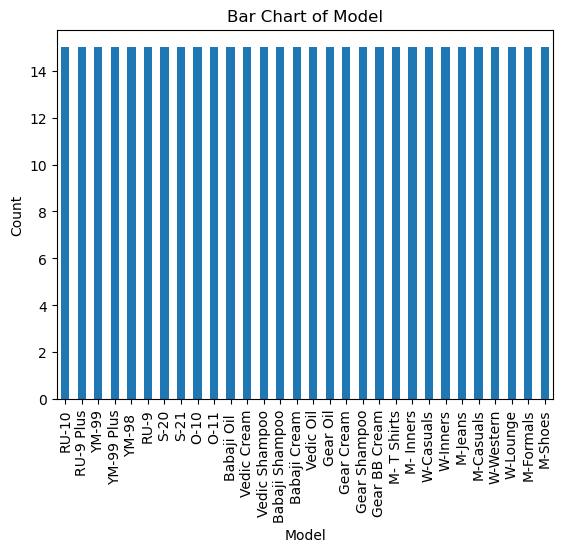

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns




# Histograms
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

# Boxplots
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Bar Charts
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


Standardization of Numerical Variables

Before Standardization:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146   

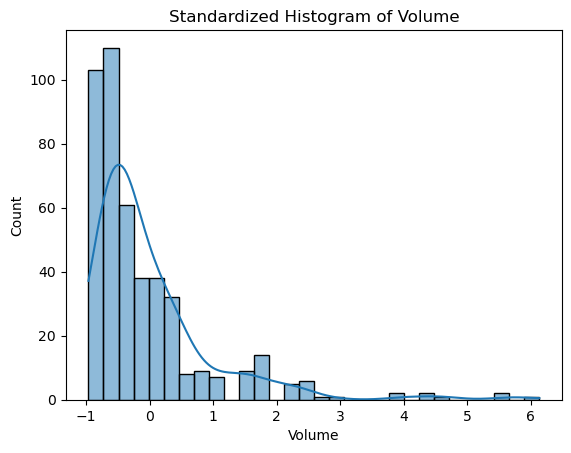

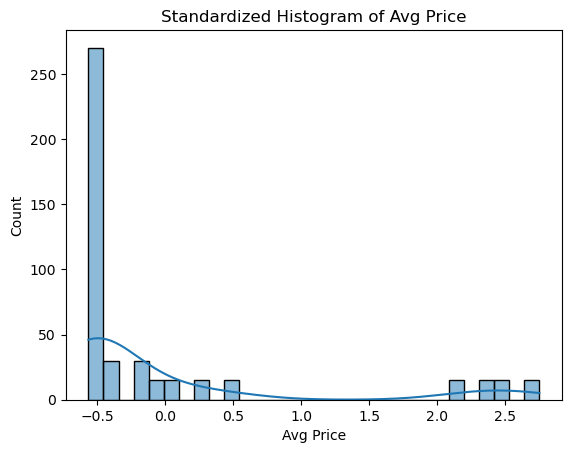

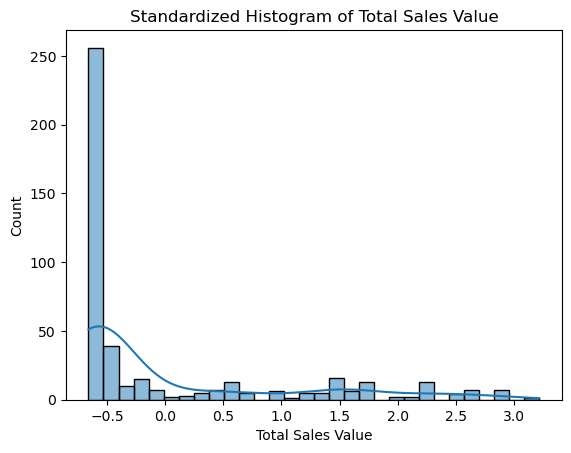

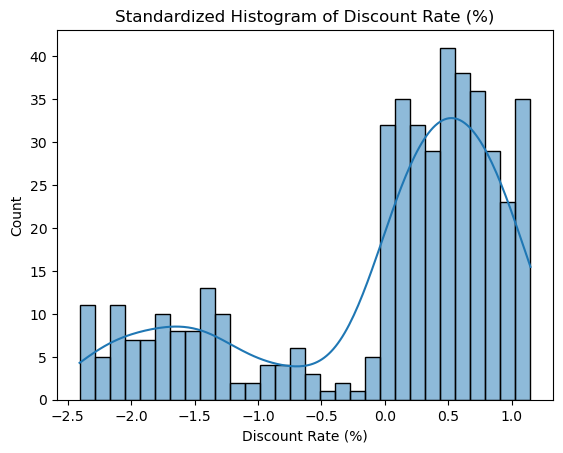

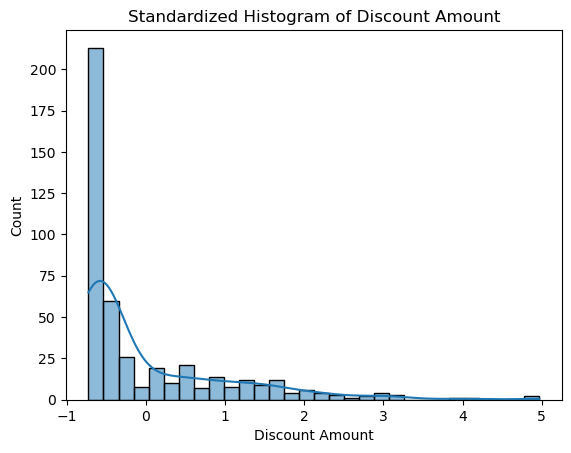

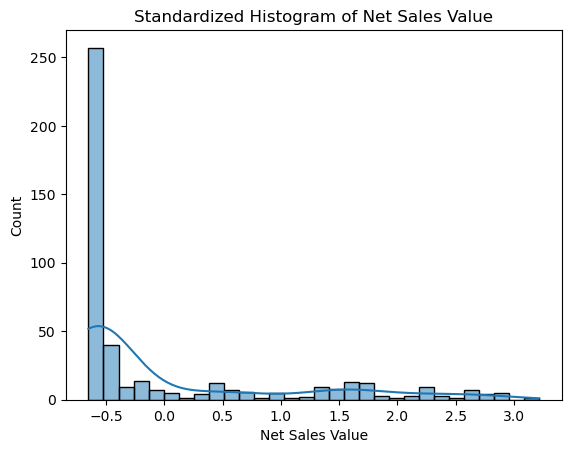

In [4]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Apply Z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

# Create standardized DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Show before and after standardization
print("Before Standardization:\n", df[numerical_cols].head())
print("\nAfter Standardization:\n", scaled_df.head())

# Plot histograms after standardization
for col in scaled_df.columns:
    plt.figure()
    sns.histplot(scaled_df[col], kde=True, bins=30)
    plt.title(f"Standardized Histogram of {col}")
    plt.show()


Conversion of Categorical Data into Dummy Variables

In [5]:
# Apply One-Hot Encoding
encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show sample
print("Original Data Sample:\n", df.head())
print("\nOne-Hot Encoded Data Sample:\n", encoded_df.head())


Original Data Sample:
          Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     

Conclusion

The descriptive analytics and visualizations provided key insights into the dataset, highlighting central tendencies, variability, and categorical patterns. These steps helped identify outliers and understand data distributions more clearly. Preprocessing techniques, including standardization and one-hot encoding, played a crucial role in preparing the data for advanced analysis. Standardization ensured comparability among numerical variables, while encoding transformed categorical variables into machine-readable formats. Together, these processes enhanced data quality, interpretability, and readiness for reliable machine learning applications.